In [13]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color
from scipy.cluster.vq import kmeans2

%matplotlib inline

In [14]:
def d(x,y):
    return np.abs( np.mod( x - y + 90, 180) - 90 )

def G(x, y, sigma=1):
    return np.exp(-0.5*d(x,y)**2 / sigma**2)

def G2D(x_range, y_range, mean, sigma=1):
    x0 = mean[0]
    y0 = mean[1]
    return np.exp( -1*( ( x_range - x0)**2 + (y_range-y0)**2) / (2*sigma**2) )

In [15]:
# Orientation preference map: for now, use k-means on Blasdel image
rgb_img = io.imread('../../figures/v1-topology-blasdel-figure6.png')

lab_img = color.rgb2lab(rgb_img) # convert to L*a*b* colourspace
ab = lab_img[:,:,1:]
n_rows = np.shape(ab)[0]
n_cols = np.shape(ab)[1]

ab = np.reshape(ab, (n_rows*n_cols, 2))
n_colours = 6
whitened = whiten(ab)
centroids, labels = kmeans2(ab, n_colours, iter=3)

labels = np.reshape(labels, (n_rows, n_cols))

rgb_labels = np.tile(labels[:,:,None], [1,1,3])

print labels[:,:,0] == labels[:,:,2]


for i in range(n_colours):
    pass



C:\Anaconda\lib\site-packages\scipy\cluster\vq.py:600: UserWarning: One of the clusters is empty. Re-run kmean with a different initialization.
  warnings.warn("One of the clusters is empty. "


IndexError: too many indices for array

(75L, 75L, 5625L)
(75L, 75L)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


ValueError: zero-size array to reduction operation minimum which has no identity

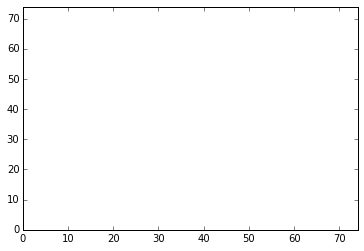

In [25]:
N_pairs = 75 # no. of E/I pairs to a side of a grid
size = 16. # size of grid side (degrees)
dx = size / N_pairs

xy_range = np.linspace(0, size, N_pairs)
xv, yv = np.meshgrid(xy_range, xy_range)

# Connection weight parameters (from supp. materials S1.1.2):
k_E = 0.1
k_I = 0.5
J_EE = 0.1
J_IE = 0.38
J_EI = 0.089
J_II = 0.096
k = 0.012
n_E = 2.0 
n_i = 2.2
sig_EE = 8*dx
sig_IE = 12*dx
sig_EI = 4*dx
sig_II = 4*dx
sig_ori = 45
sig_FF = 32
sig_RF = dx

tau_E = 0.02 # milliseconds
tau_I = 0.01
dt = 0.001 

# calculate probability of no connections for each neuron (sparse connectivity)
#pW_EE = k_E * G( xv[:,:,None], yv
#pW_EI = 

w_EE = np.zeros((N_pairs, N_pairs, N_pairs**2))
w_IE = np.copy(w_EE)
w_ori = np.copy(W_EE)

for i in range(0, N_pairs-1):
    for j in range(0, N_pairs-1):
        w_EE[:,:, i+j] = G2D( xv, yv, [i,j], sig_EE)
        w_IE[:,:, i+j] = G2D( xv, yv, [i,j], sig_IE)
        
        
print np.shape(w_EE)
print np.shape(w_EE[:,:,2000])
print w_EE[:,:,2000]
plt.figure()
plt.contour(w_EE[:,:,2100])